In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

In [5]:
data=pd.read_csv(r"C:\Users\refra\OneDrive\Desktop\survey.csv")

In [6]:
data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.shape()


TypeError: 'tuple' object is not callable

In [8]:
data.shape


(1259, 27)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

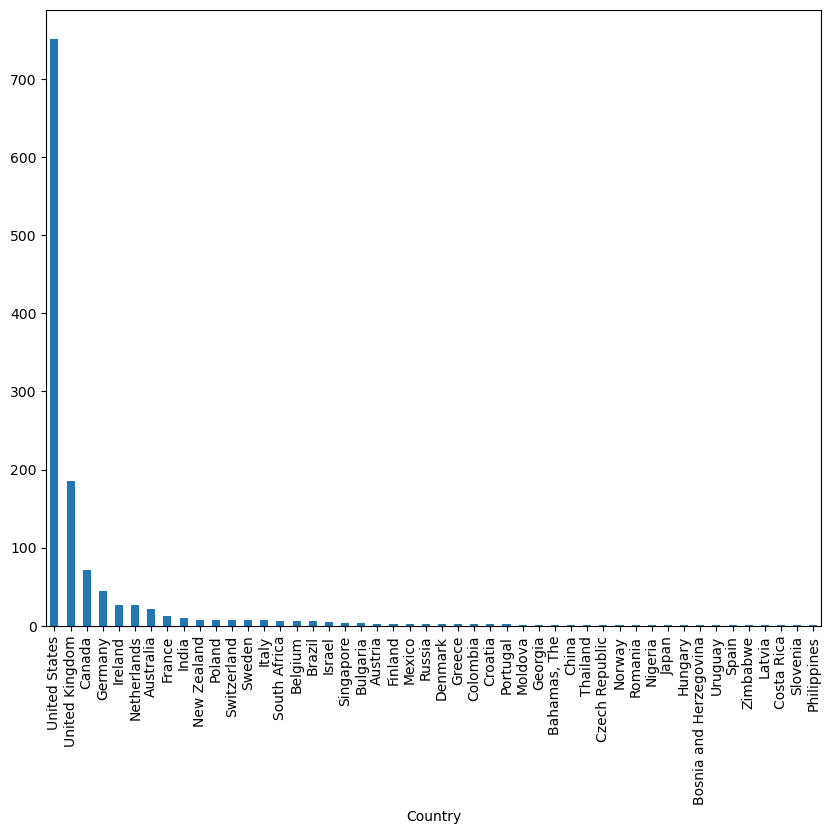

In [10]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [11]:
data.drop(['Country','state','Timestamp','comments'],axis=1,inplace=True)

In [12]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
data['self_employed'].value_counts()


self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [14]:
data['self_employed'].fillna('No',inplace=True)

In [15]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

<Axes: xlabel='Age'>

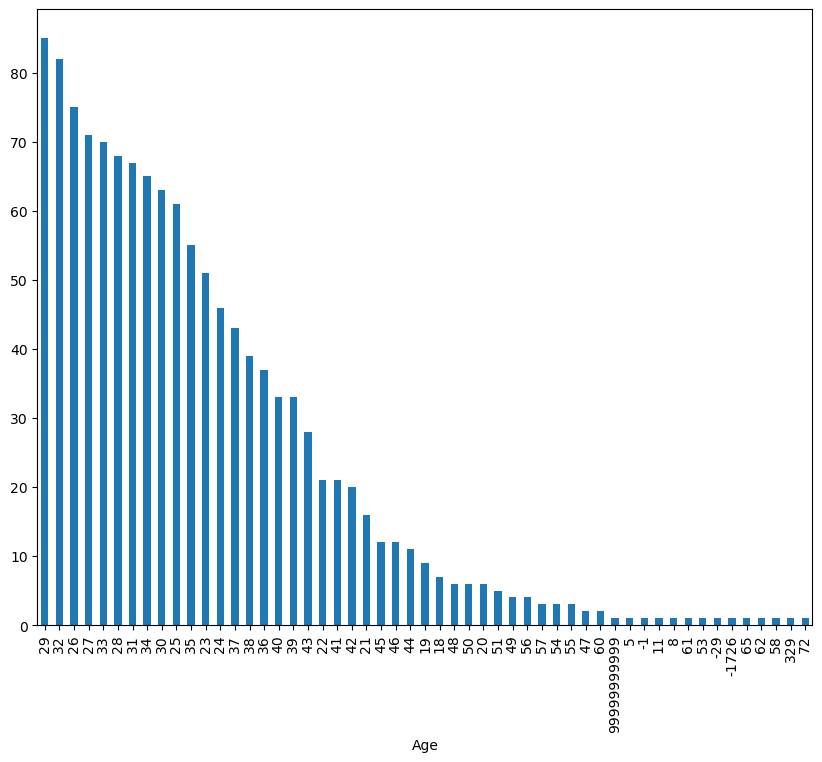

In [17]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [22]:
data.drop(data[(data[ 'Age' ]>60) | (data[ 'Age' ]<18)].index,inplace=True)

<Axes: xlabel='Gender'>

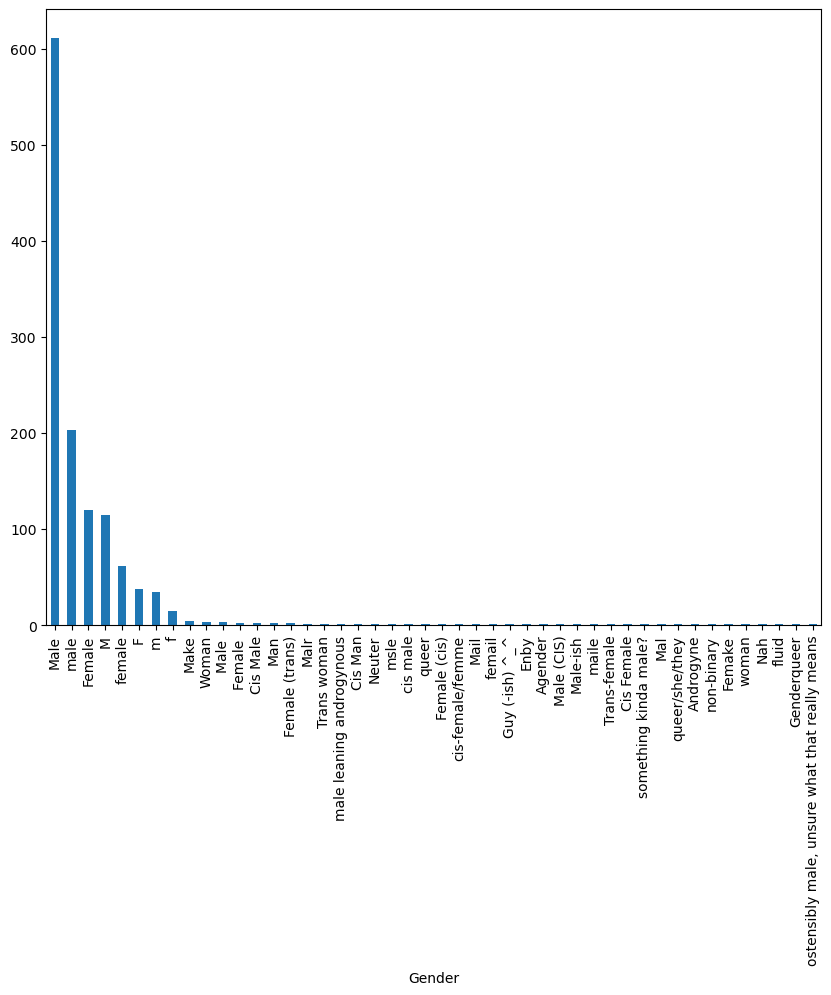

In [23]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [28]:
data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',
'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make', ], 'Male', inplace =
True)
data['Gender'].replace([ 'Female', 'female', 'F', 'f', 'Woman', 'Female',
'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
'woman',], 'Female', inplace=True) 
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
'fluid', 'queer', 'Androgyne', 'Trans-female', 'male learning androgynous',
' Agender ', 'A little about you', 'Nah', 'All',
'ostensibly male, unsure what that really means',
'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace=True)

C:\Users\refra\AppData\Local\Temp\ipykernel_13832\1483789242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

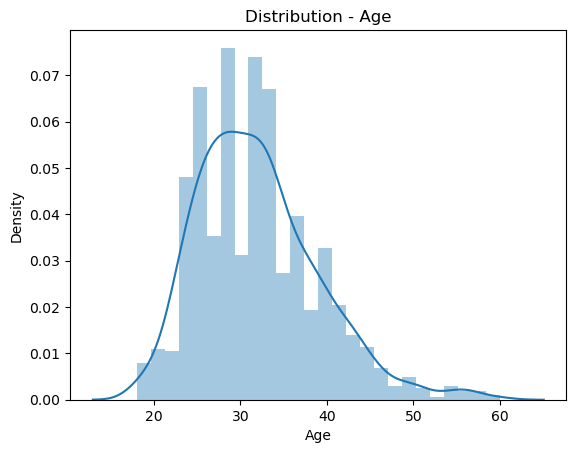

In [32]:
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

ValueError: Cannot use `hue` without `x` and `y`

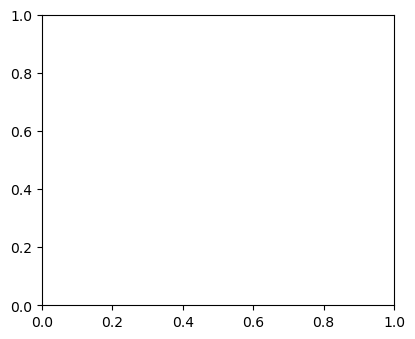

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'],hue=data['treatment'])
plt.title('Employment Type')